In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

# **1.1    Data exploration with PCA**

1.  Import and view the data.  How many columns do you have?  Which columns will youuse in your PCA?


In [20]:
pottery=pd.read_csv("/content/Pottery.csv")
pottery

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


a:the data has 7 columns and 5 of those would be used in PCA

2.  Pre-process the data and perform PCA with 3 PCs.

In [21]:
pottery.drop(["Unnamed: 0"],axis=1,inplace=True)
pottery.set_index("Site",inplace=True)
print(pottery)
pottery_scaled=StandardScaler().fit_transform(pottery)
pottery_scaled

               Al    Fe    Mg    Ca    Na
Site                                     
Llanedyrn    14.4  7.00  4.30  0.15  0.51
Llanedyrn    13.8  7.08  3.43  0.12  0.17
Llanedyrn    14.6  7.09  3.88  0.13  0.20
Llanedyrn    11.5  6.37  5.64  0.16  0.14
Llanedyrn    13.8  7.06  5.34  0.20  0.20
Llanedyrn    10.9  6.26  3.47  0.17  0.22
Llanedyrn    10.1  4.26  4.26  0.20  0.18
Llanedyrn    11.6  5.78  5.91  0.18  0.16
Llanedyrn    11.1  5.49  4.52  0.29  0.30
Llanedyrn    13.4  6.92  7.23  0.28  0.20
Llanedyrn    12.4  6.13  5.69  0.22  0.54
Llanedyrn    13.1  6.64  5.51  0.31  0.24
Llanedyrn    12.7  6.69  4.45  0.20  0.22
Llanedyrn    12.5  6.44  3.94  0.22  0.23
Caldicot     11.8  5.44  3.94  0.30  0.04
Caldicot     11.6  5.39  3.77  0.29  0.06
IsleThorns   18.3  1.28  0.67  0.03  0.03
IsleThorns   15.8  2.39  0.63  0.01  0.04
IsleThorns   18.0  1.50  0.67  0.01  0.06
IsleThorns   18.0  1.88  0.68  0.01  0.04
IsleThorns   20.8  1.51  0.72  0.07  0.10
AshleyRails  17.7  1.12  0.56  0.0

array([[-0.03145568,  1.07166989,  0.54199637,  0.03487194,  2.64999905],
       [-0.23591756,  1.1055258 ,  0.13495926, -0.26735151,  0.08698028],
       [ 0.03669829,  1.10975779,  0.3454957 , -0.16661036,  0.31312899],
       [-1.01968814,  0.80505457,  1.1689271 ,  0.13561308, -0.13916844],
       [-0.23591756,  1.09706182,  1.02856948,  0.53857767,  0.31312899],
       [-1.22415003,  0.75850268,  0.15367361,  0.23635423,  0.4638948 ],
       [-1.49676588, -0.08789516,  0.52328202,  0.53857767,  0.16236318],
       [-0.98561116,  0.5553672 ,  1.29524897,  0.33709538,  0.01159737],
       [-1.15599607,  0.43263951,  0.6449253 ,  1.44524799,  1.06695804],
       [-0.37222549,  1.03781397,  1.91282252,  1.34450685,  0.31312899],
       [-0.71299531,  0.70348682,  1.19232004,  0.74005996,  2.87614776],
       [-0.47445644,  0.91931828,  1.10810547,  1.64673029,  0.61466061],
       [-0.61076436,  0.94047822,  0.61217519,  0.53857767,  0.4638948 ],
       [-0.67891832,  0.83467849,  0.3

In [22]:
pca=PCA(n_components=3, svd_solver='full')
pottery_pca=pca.fit_transform(pottery_scaled)
pottery_pca_pd=pd.DataFrame(data=pottery_pca,columns=["PC1","PC2","PC3"],index=pottery.index)
print(pottery_pca_pd)
pottery_loading_pd=pd.DataFrame(data=pca.components_.T,columns=["PC1","PC2","PC3"],index=pottery.columns)
print(pottery_loading_pd)

                  PC1       PC2       PC3
Site                                     
Llanedyrn   -1.778026  2.289445 -0.075289
Llanedyrn   -0.611193  0.122065 -0.499044
Llanedyrn   -0.722428  0.370209 -0.207550
Llanedyrn   -1.417696 -0.555600 -0.557590
Llanedyrn   -1.486801 -0.004081  0.195248
Llanedyrn   -1.259044 -0.092347 -0.783259
Llanedyrn   -1.180703 -0.607921 -0.575010
Llanedyrn   -1.490385 -0.498745 -0.336582
Llanedyrn   -2.076010  0.000500  0.220714
Llanedyrn   -2.311320 -0.376341  0.800851
Llanedyrn   -2.621615  1.952241  0.094513
Llanedyrn   -2.155016 -0.220571  0.828020
Llanedyrn   -1.431624  0.007079 -0.106344
Llanedyrn   -1.413437 -0.013782 -0.037041
Caldicot    -1.153767 -1.634243  0.411643
Caldicot    -1.145386 -1.490205  0.286453
IsleThorns   2.668073  0.029649  0.126326
IsleThorns   2.135919 -0.119176 -0.680174
IsleThorns   2.585526  0.262264 -0.096612
IsleThorns   2.561672  0.138060 -0.121480
IsleThorns   2.615076  0.654624  0.983277
AshleyRails  2.415728  0.048399  0

3.  Plot the cumulative explained variance graph.  What percent of the variance do thefirst 2 and 3 components describe?

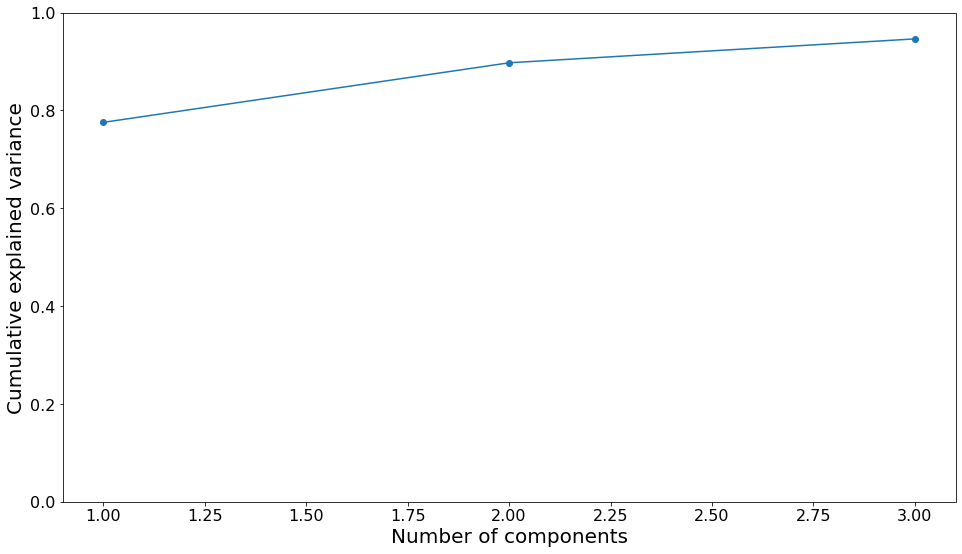

array([0.12176197, 0.04883844])

In [23]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()
pca.explained_variance_ratio_[1:3]

4.  Plot the scores-loadings graph for PC1-PC2.  Visualize the different sites with a differ-ent colour or symbol.

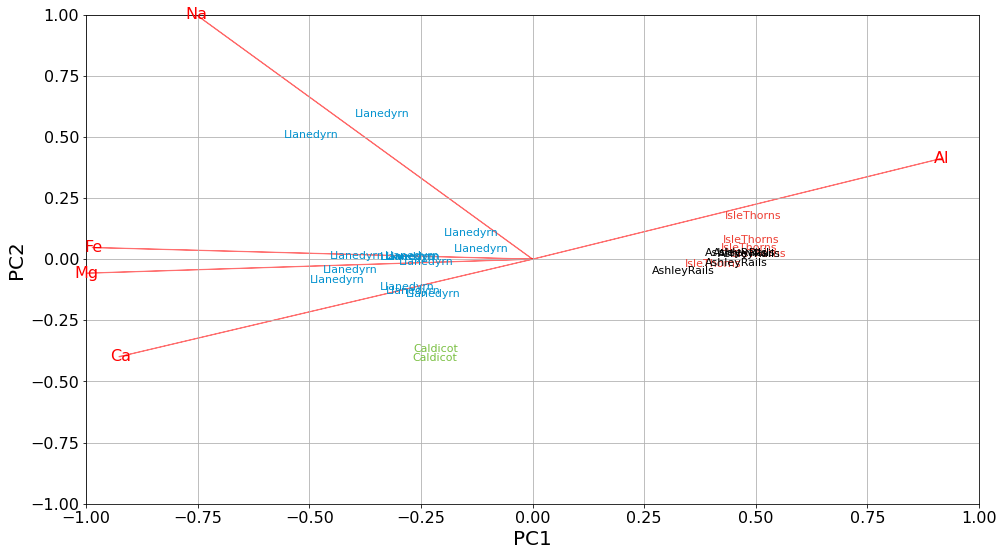

In [24]:
def pltpcs(score,loading,loading_labels=None,score_labels=None):
  score_pc1=score[:,0]
  score_pc2=score[:,1]
  score_pc1_scaled = score_pc1/(score_pc1.max() - score_pc1.min())
  score_pc2_scaled = score_pc2/(score_pc2.max() - score_pc2.min())
  loadings_scaled=MaxAbsScaler().fit_transform(loading)
  color_wheel = {"Llanedyrn": "#0392cf", "Caldicot": "#7bc043", "IsleThorns": "#ee4035","AshleyRails":"#000000"}
  for (x,y), label in zip(np.vstack((score_pc1_scaled, score_pc2_scaled)).T,score_labels):
    plt.text(x, y, label, ha='center', size=11,c=color_wheel[label])
  for i in range(len(loading)):
    plt.arrow(0, 0, loadings_scaled[i,0], loadings_scaled[i,1], color = 'r',alpha = 0.5)
    if loading_labels is None:
      plt.text(loadings_scaled[i,0], loadings_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
    else:
      plt.text(loadings_scaled[i,0], loadings_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1), fontsize=20);
  plt.ylabel("PC{}".format(2), fontsize=20);
  plt.tick_params(labelsize=16)
  plt.grid()
plt.rcParams["figure.figsize"] = [16,9]
pltpcs(pottery_pca[:,:2],pottery_loading_pd.iloc[:,:2],loading_labels=pottery_loading_pd.index,score_labels=pottery_pca_pd.index)
plt.show()

5.  How does the map of scores-loadings explains the reason that your company uses theraw material from Isle Thorns and Ashley Rails to manufacture Product B?

a: products from Isle Thorns and Ashley Rails contains more aluminum contents than that from Llanedyrn and Caldicot. Also, the calcium, 
magnesium, and iron impurity of products from Isle Thorns and Ashley Rails
have been diminished to relatively lower levels.

6.  Is the raw material from Caldicot a good replacement for Llanedyrn?  Yes or no andwhy?

a: If the sodium impurity is an undesirable property,then material from Caldicot can be a good replacement because there are significant differences in sodium purity between Caldicot and Llanedyrn.

7.  What  are  the  biggest  differences  in  the  two  big  clusters?   How  are  the  two  samplesfrom the candidate Caldicot different than the Llanedyrn samples?

a: There are significant differences in sodium purity between Caldicot and Llanedyrn.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

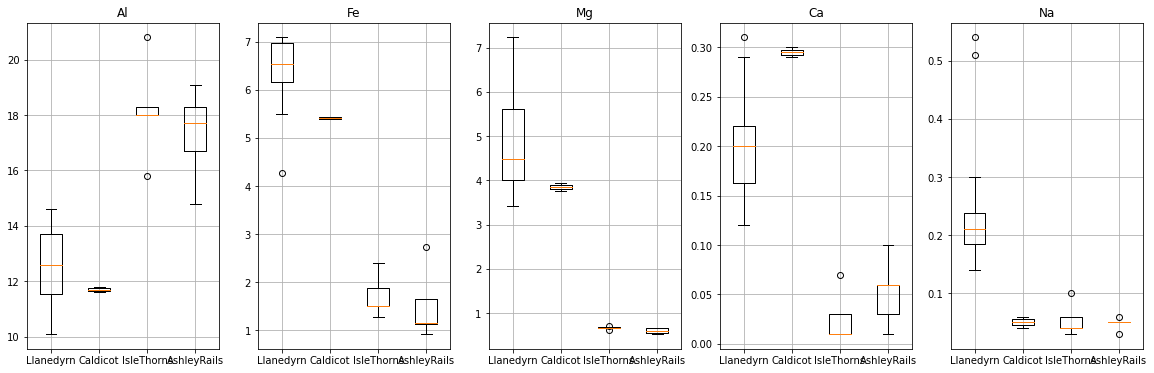

In [25]:
plt.rcParams["figure.figsize"] = [20,6]
plt.subplot(151)
plt.boxplot([pottery[pottery.index=="Llanedyrn"]["Al"].values,pottery[pottery.index=="Caldicot"]["Al"].values,pottery[pottery.index=="IsleThorns"]["Al"].values,pottery[pottery.index=="AshleyRails"]["Al"].values],labels=["Llanedyrn","Caldicot","IsleThorns","AshleyRails"])
plt.title("Al")
plt.grid(True)
plt.subplot(152)
plt.boxplot([pottery[pottery.index=="Llanedyrn"]["Fe"].values,pottery[pottery.index=="Caldicot"]["Fe"].values,pottery[pottery.index=="IsleThorns"]["Fe"].values,pottery[pottery.index=="AshleyRails"]["Fe"].values],labels=["Llanedyrn","Caldicot","IsleThorns","AshleyRails"])
plt.title("Fe")
plt.grid(True)
plt.subplot(153)
plt.boxplot([pottery[pottery.index=="Llanedyrn"]["Mg"].values,pottery[pottery.index=="Caldicot"]["Mg"].values,pottery[pottery.index=="IsleThorns"]["Mg"].values,pottery[pottery.index=="AshleyRails"]["Mg"].values],labels=["Llanedyrn","Caldicot","IsleThorns","AshleyRails"])
plt.title("Mg")
plt.grid(True)
plt.subplot(154)
plt.boxplot([pottery[pottery.index=="Llanedyrn"]["Ca"].values,pottery[pottery.index=="Caldicot"]["Ca"].values,pottery[pottery.index=="IsleThorns"]["Ca"].values,pottery[pottery.index=="AshleyRails"]["Ca"].values],labels=["Llanedyrn","Caldicot","IsleThorns","AshleyRails"])
plt.title("Ca")
plt.grid(True)
plt.subplot(155)
plt.boxplot([pottery[pottery.index=="Llanedyrn"]["Na"].values,pottery[pottery.index=="Caldicot"]["Na"].values,pottery[pottery.index=="IsleThorns"]["Na"].values,pottery[pottery.index=="AshleyRails"]["Na"].values],labels=["Llanedyrn","Caldicot","IsleThorns","AshleyRails"])
plt.title("Na")
plt.grid(True)
plt.show()

# **2.1    Build a Batch Statistical Process Control model**

1.  Import the data from ’bakersyeastreferencebatches.xlsx’.  Identify how many batchesare in the data.  What is the duration of each batch and how many data points arethere per batch?  How many variables are measured (including time)?

In [26]:
yeasts=pd.read_excel("/content/bakers_yeast_reference_batches.xlsx")
print(yeasts.shape)
yeasts[yeasts["BatchID"]=="Xa"]
yeasts_processed=yeasts.drop(["Unnamed: 0","Primary ID","BatchID"],axis=1)
yeasts_processed=yeasts_processed.groupby("Time").mean()
yeasts

(1328, 11)


,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


a: batch number=1328/83=16; batch duration=13.666700; data per batch=83; vairable=8

2.  Plot the variables time-profiles in a 2x4 subplot.  Inspect the graphs (don’t just plotthem). Look for potential outliers. Which variables have the largest variability? Whichvariables are tightly controlled?

Text(0.5, 1.0, 'pH')

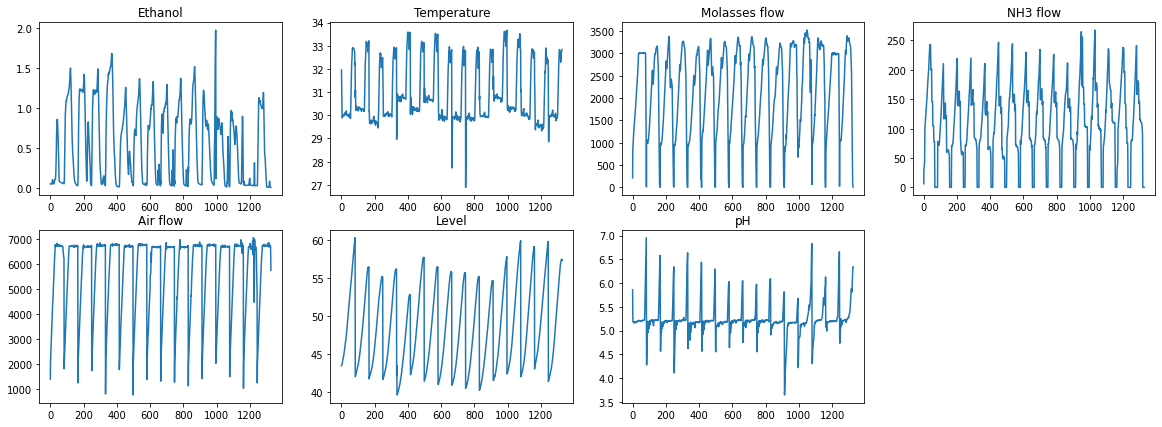

In [27]:
plt.rcParams["figure.figsize"] = [20,7]
plt.subplot(241)
plt.plot(yeasts["Ethanol"])
plt.title("Ethanol")
plt.subplot(242)
plt.plot(yeasts["Temperature"])
plt.title("Temperature")
plt.subplot(243)
plt.plot(yeasts["Molasses flow"])
plt.title("Molasses flow")
plt.subplot(244)
plt.plot(yeasts["NH3 flow"])
plt.title("NH3 flow")
plt.subplot(245)
plt.plot(yeasts["Air flow"])
plt.title("Air flow")
plt.subplot(246)
plt.plot(yeasts["Level"])
plt.title("Level")
plt.subplot(247)
plt.plot(yeasts["pH"])
plt.title("pH")



Text(0.5, 1.0, 'pH')

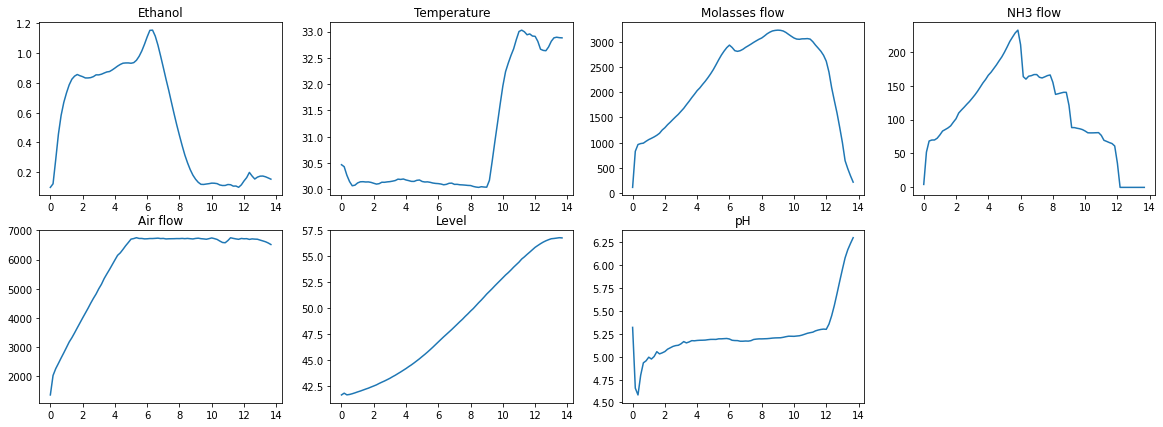

In [28]:
plt.rcParams["figure.figsize"] = [20,7]
plt.subplot(241)
plt.plot(yeasts_processed["Ethanol"])
plt.title("Ethanol")
plt.subplot(242)
plt.plot(yeasts_processed["Temperature"])
plt.title("Temperature")
plt.subplot(243)
plt.plot(yeasts_processed["Molasses flow"])
plt.title("Molasses flow")
plt.subplot(244)
plt.plot(yeasts_processed["NH3 flow"])
plt.title("NH3 flow")
plt.subplot(245)
plt.plot(yeasts_processed["Air flow"])
plt.title("Air flow")
plt.subplot(246)
plt.plot(yeasts_processed["Level"])
plt.title("Level")
plt.subplot(247)
plt.plot(yeasts_processed["pH"])
plt.title("pH")

a: pH has the largest variability. Molasses flow and air flow are tightly controlled?

3.  Select  the  features  (including  the  Time  column),  pre-process  the  data  and  performPCA with 5 principal components.  Extract the scores and loadings.

In [29]:
yeasts_prep=yeasts.set_index("BatchID")
yeasts_prep.drop(["Unnamed: 0","Primary ID"],axis=1,inplace=True)
yeasts_prep

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
BatchID,,,,,,,,
bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...
Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553


In [30]:
yeasts_prep_scaled=StandardScaler().fit_transform(yeasts_prep)
pca5=PCA(n_components=5, svd_solver='full')
yeasts_pca=pca5.fit_transform(yeasts_prep_scaled)
yeasts_pca_pd=pd.DataFrame(data=yeasts_pca,columns=["PC1","PC2","PC3","PC4","PC5"],index=yeasts_prep.index)
print(yeasts_pca_pd)
yeasts_loading_pd=pd.DataFrame(data=pca5.components_.T,columns=["PC1","PC2","PC3","PC4","PC5"],index=yeasts_prep.columns)
print(yeasts_loading_pd)
yeasts_pca_pd.index

              PC1       PC2       PC3       PC4       PC5
BatchID                                                  
bb      -0.808176  4.508288 -0.200368  1.295502 -0.754945
bb      -1.303347  3.391210  0.824346  0.666865 -0.552935
bb      -1.630004  3.073121  1.085677  0.706676 -0.168488
bb      -1.790453  2.816650  1.059588  0.979711  0.160562
bb      -1.811100  2.636318  1.033483  1.094550  0.294213
...           ...       ...       ...       ...       ...
Xa       3.772295  2.368292 -1.644665  0.830572 -0.163892
Xa       3.875235  2.595895 -1.942104  0.980115 -0.265168
Xa       3.963794  2.665704 -2.074648  1.041445 -0.323446
Xa       3.900935  2.872436 -2.046092  1.108283 -0.312934
Xa       3.808085  3.028983 -1.966617  1.124243 -0.300219

[1328 rows x 5 columns]
                    PC1       PC2       PC3       PC4       PC5
Time           0.471425 -0.115005 -0.073487 -0.109928  0.166210
Ethanol       -0.315056 -0.164245 -0.630171 -0.587107  0.255200
Temperature    0.399243  0.20

Index(['bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb', 'bb',
       ...
       'Xa', 'Xa', 'Xa', 'Xa', 'Xa', 'Xa', 'Xa', 'Xa', 'Xa', 'Xa'],
      dtype='object', name='BatchID', length=1328)

4.  In  order  to  plot  the  scores-loading  plot,  you  need  to  pivot  the  scores  BatchID  withindex ’Time’ (use pandas pivottable).

In [31]:
yeasts_prep=yeasts_prep.pivot_table(index=["BatchID","Time"])
yeasts_prep_scaled=StandardScaler().fit_transform(yeasts_prep)
pca5=PCA(n_components=5, svd_solver='full')
yeasts_pca=pca5.fit_transform(yeasts_prep_scaled)
yeasts_pca_pd=pd.DataFrame(data=yeasts_pca,columns=["PC1","PC2","PC3","PC4","PC5"],index=yeasts_prep.index)
print(yeasts_pca_pd)
yeasts_loading_pd=pd.DataFrame(data=pca5.components_.T,columns=["PC1","PC2","PC3","PC4","PC5"],index=yeasts_prep.columns)
print(yeasts_loading_pd)

                        PC1       PC2       PC3       PC4       PC5
BatchID Time                                                       
Ma      0.000000  -1.610232  4.112453  1.891981 -0.385884 -0.222938
        0.166667  -2.642548  3.448596  3.722107 -2.295239 -0.589393
        0.333333  -2.724030  2.604524  3.415466 -2.097890 -0.846085
        0.500000  -2.946707  2.309377  2.705208 -1.964470 -0.468704
        0.666667  -3.048907  2.315431  2.092796 -1.932703 -0.096525
...                     ...       ...       ...       ...       ...
lb      13.000000  2.779712  1.950836 -0.795291  0.053360 -0.320854
        13.166700  2.846843  2.188168 -1.038958  0.141266 -0.454775
        13.333300  2.898132  2.247380 -1.123720  0.171792 -0.502976
        13.500000  2.923235  2.283639 -1.170470  0.191135 -0.529803
        13.666700  2.947149  2.303007 -1.193378  0.198863 -0.545272

[1328 rows x 5 columns]
                    PC1       PC2       PC3       PC4       PC5
Air flow       0.304539 -0.

5.  Plot  the  scores-loadings  plot  with  one  line  per  batch  (this  is  why  the  pivot  in  theprevious  step  was  needed).   The  output  should  look  similar  to  the  plot  below.   Youmay choose a different scaling, but the trend should be the same as this graph.

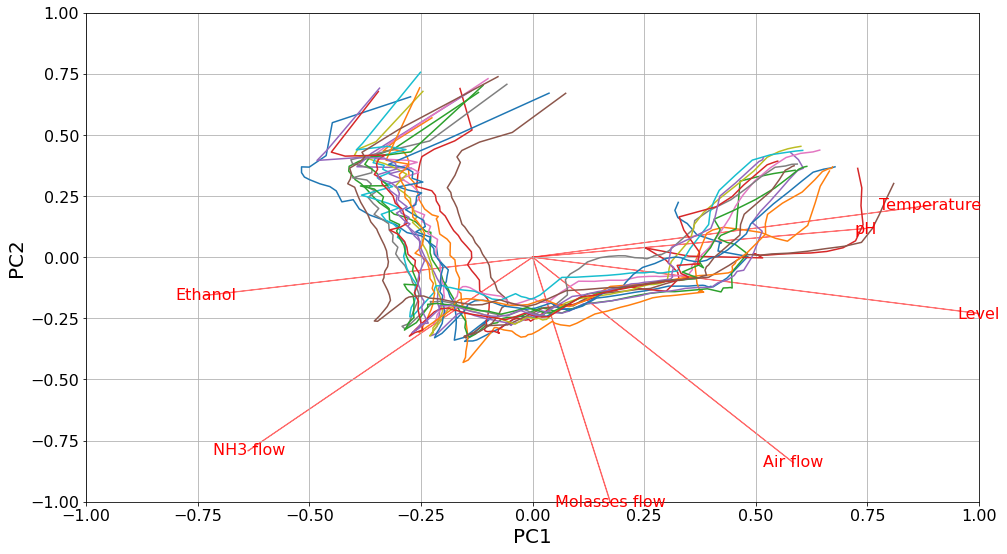

In [32]:
def pltpc5(score,loading,loading_labels=None):
  for k in range(16):
    score_pc1=score[83*k:83*(k+1),0]
    score_pc2=score[83*k:83*(k+1):,1]
    score_pc1_scaled = score_pc1/(score_pc1.max() - score_pc1.min())
    score_pc2_scaled = score_pc2/(score_pc2.max() - score_pc2.min())
    plt.plot(score_pc1_scaled, score_pc2_scaled)
  loadings_scaled=MaxAbsScaler().fit_transform(loading)
  for i in range(len(loading)):
    plt.arrow(0, 0, loadings_scaled[i,0], loadings_scaled[i,1], color = 'r',alpha = 0.5)
    if loading_labels is None:
      plt.text(loadings_scaled[i,0], loadings_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
    else:
      plt.text(loadings_scaled[i,0], loadings_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1), fontsize=20);
  plt.ylabel("PC{}".format(2), fontsize=20);
  plt.tick_params(labelsize=16)
  plt.grid()
plt.rcParams["figure.figsize"] = [16,9]
pltpc5(yeasts_pca[:,:2],yeasts_loading_pd.iloc[:,:2],loading_labels=yeasts_loading_pd.index)
plt.show()

6.  Explain this graph.  In which quarter do the batches start and end?  What happens atthe kink where the direction of the lines changes?  Can you tell from this graph whichvariables do not change in the first phase and which in the second phase?

a: batches started from top-left quarter(only one started from top right) and ended at top-right. Kinks where the direction of the lines changes present some variables changed dramatic over short time. NH3 flow did not change much during the first stage. Molasses flow did not change much during the second stage. Air flow did not change much during the last stage.

7.  Plot the cumulative explained variance.  How much variance do the first two principalcomponents capture?

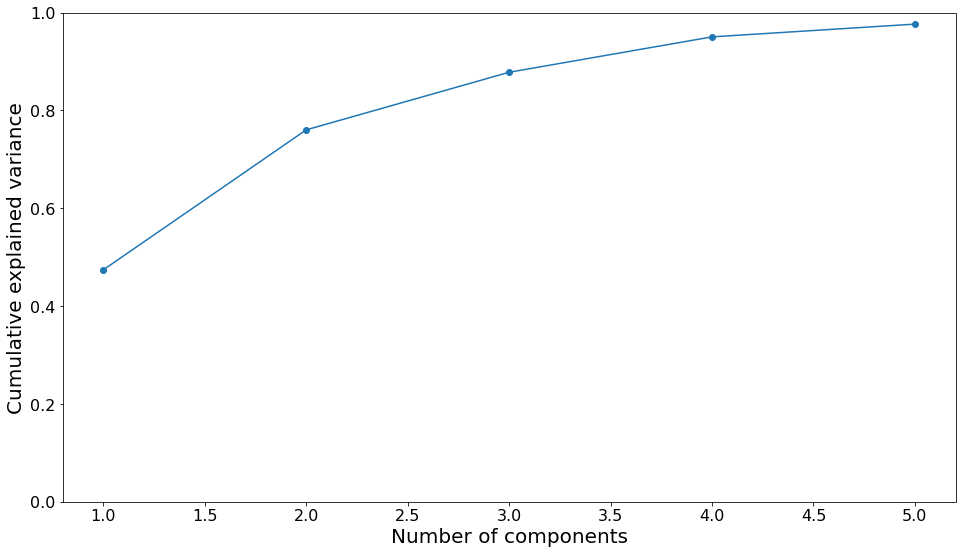

array([0.47405764, 0.28617571])

In [33]:
plt.plot(range(1,pca5.n_components+1), np.cumsum(pca5.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()
pca5.explained_variance_ratio_[:2]

# **2.2    Use the model to monitor running batches**

1.  Load the data from the file ’todaysbatches.xlsx’ and repeat the same procedure as inthe steps 3-4 of the previous section with the exception of the PCA modeling.  Here,instead of fit the data to the model and transform, you will only transform them withthe model object you created in the previous section.

In [34]:
todays_batches=pd.read_excel("/content/todays_batches.xlsx")
todays_batches_prep=todays_batches.set_index(["BatchID","Time"])
todays_batches_prep.drop(["Unnamed: 0","Primary ID"],axis=1,inplace=True)
todays_batches_prep

Ethanol  Temperature  ...    Level       pH
BatchID Time                             ...                  
Ya      0.000000   0.30350      29.0885  ...  41.9216  4.86282
        0.166667   0.41224      29.5509  ...  41.9911  4.00324
        0.333333   1.16614      29.9639  ...  42.3624  4.05839
        0.500000   2.22696      29.9746  ...  42.8531  4.35465
        0.666667   3.13590      29.9466  ...  43.2146  4.76967
...                    ...          ...  ...      ...      ...
Za      13.000000  0.01637      33.2882  ...  57.2191  6.38039
        13.166700  0.01575      33.3834  ...  57.2289  6.48979
        13.333300  0.01512      33.4438  ...  57.2021  6.55989
        13.500000  0.01444      33.4531  ...  57.0425  6.59559
        13.666700  0.01386      33.4518  ...  57.2048  6.61546

[166 rows x 7 columns]

In [36]:
todays_batches_prep_scaled=StandardScaler().fit_transform(todays_batches_prep)
todays_batches_pca=pca5.transform(todays_batches_prep_scaled)
todays_batches_pca_pd=pd.DataFrame(data=todays_batches_pca,columns=["PC1","PC2","PC3","PC4","PC5"],index=todays_batches_prep.index)
print(todays_batches_pca_pd)
todays_batches_loading_pd=pd.DataFrame(data=pca5.components_.T,columns=["PC1","PC2","PC3","PC4","PC5"],index=todays_batches_prep.columns)
print(todays_batches_loading_pd)

                        PC1       PC2       PC3       PC4       PC5
BatchID Time                                                       
Ya      0.000000  -0.565517  2.772208  1.651635  0.873720  1.591869
        0.166667  -1.772750  2.322985  2.924890 -0.424794  1.344297
        0.333333  -1.757781  2.130871  2.548169 -0.596373  1.310734
        0.500000  -0.543343  0.866126  2.451840 -0.416560  1.968351
        0.666667  -0.211355  0.905281  1.563231  0.126962  1.717722
...                     ...       ...       ...       ...       ...
Za      13.000000  0.650310  1.747878 -3.305678 -0.396633 -1.351353
        13.166700  0.668523  1.776217 -3.555620 -0.284565 -1.366604
        13.333300  0.703073  1.830761 -3.706828 -0.226584 -1.322768
        13.500000  0.700949  1.813185 -3.782460 -0.149087 -1.325903
        13.666700  0.741961  1.830998 -3.814966 -0.147102 -1.340221

[166 rows x 5 columns]
                    PC1       PC2       PC3       PC4       PC5
Ethanol        0.304539 -0.5

2.  Plot the same scores-loadings plot for the data in the batches you used to develop themodel with solid lines.  Overlay the new incoming data from the two current batcheswith dashed lines and two different colours to distinguish them.  Also, add a legend forthe two batches so that the viewer can distinguish them.

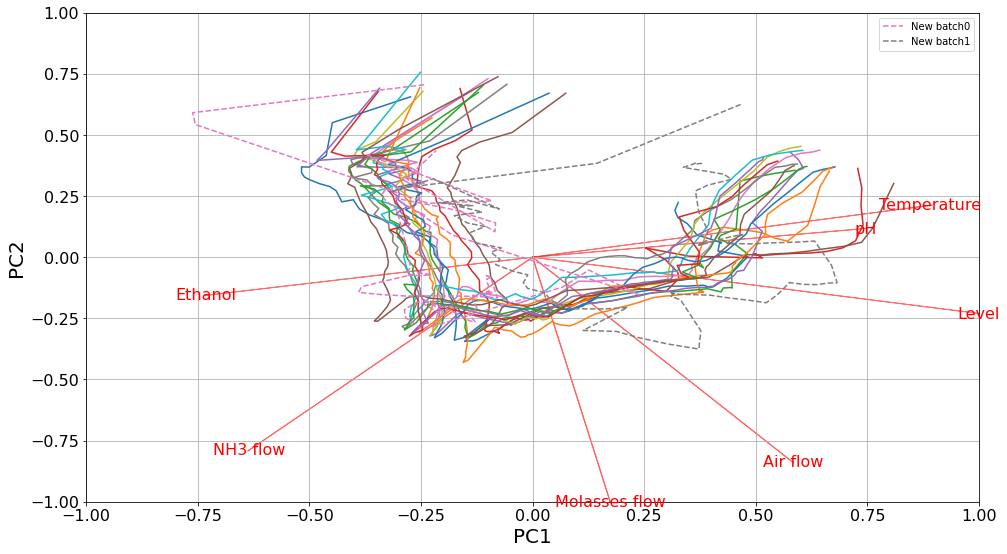

In [47]:
def pltpc5today(score,loading,loading_labels=None):
  for k in range(2):
    score_pc1=score[83*k:83*(k+1),0]
    score_pc2=score[83*k:83*(k+1):,1]
    score_pc1_scaled = score_pc1/(score_pc1.max() - score_pc1.min())
    score_pc2_scaled = score_pc2/(score_pc2.max() - score_pc2.min())
    plt.plot(score_pc1_scaled, score_pc2_scaled,"--",label="New batch"+str(k))
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1), fontsize=20);
  plt.ylabel("PC{}".format(2), fontsize=20);
  plt.tick_params(labelsize=16)
  plt.grid()
  plt.legend()
plt.rcParams["figure.figsize"] = [16,9]
pltpc5(yeasts_pca[:,:2],yeasts_loading_pd.iloc[:,:2],loading_labels=yeasts_loading_pd.index)
pltpc5today(todays_batches_pca[:,:2],todays_batches_loading_pd.iloc[:,:2],loading_labels=todays_batches_loading_pd.index)
plt.grid()
plt.show()

3.  Do the batches show behaviour similar to that of the reference ones or there are outliersindicating potential problems?

a: Both of the two new batches contained outliers. There are significant difference in terms of variables changing pattern during the initial stage (top-left quarter) between two new batches and old batches. Additionaly, the pattern of new batch 1 in the bottom-right quarter was unreasonable and unexpected.